In [50]:
import numpy as np
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

In [51]:
image = imread("images/pexels-photo-139099.jpeg")
image.shape

(341, 500, 3)

In [52]:
a = np.array([
    [0.412453,0.35758,0.180423],
    [0.212671,0.715160,0.072169],
    [0.019334,0.119193,0.950227]])
a

array([[0.412453, 0.35758 , 0.180423],
       [0.212671, 0.71516 , 0.072169],
       [0.019334, 0.119193, 0.950227]])

In [53]:
R = image[...,0]/255.0
G = image[...,1]/255.0
B = image[...,2]/255.0

In [54]:
R

array([[0.78431373, 0.78431373, 0.76862745, ..., 0.2627451 , 0.2627451 ,
        0.2627451 ],
       [0.77254902, 0.76862745, 0.75294118, ..., 0.25882353, 0.25882353,
        0.25882353],
       [0.74509804, 0.7372549 , 0.73333333, ..., 0.24705882, 0.24705882,
        0.24705882],
       ...,
       [0.        , 0.00392157, 0.00392157, ..., 0.21960784, 0.21176471,
        0.20784314],
       [0.        , 0.        , 0.00392157, ..., 0.21960784, 0.21568627,
        0.20784314],
       [0.        , 0.        , 0.        , ..., 0.21960784, 0.21568627,
        0.20784314]])

In [55]:
D = np.array([])
for i in a:
    m = (i[0]*R)+(i[1]*G)+(i[2]*B)
    D = np.append(D,m)

print(i[0])
print(i[1])

0.019334
0.119193


In [56]:
D.size/3

170500.0

In [57]:
D = D.reshape((-1,3))
D

array([[0.47871925, 0.47871925, 0.46801696],
       [0.4605496 , 0.45309504, 0.4442254 ],
       [0.43859069, 0.43486341, 0.44182561],
       ...,
       [0.33459605, 0.34204881, 0.33777918],
       [0.33350956, 0.32923994, 0.32070069],
       [0.31643107, 0.31216144, 0.3036222 ]])

In [58]:
X = D[...,0]
Y = D[...,1]
Z = D[...,2]

In [59]:
L = np.zeros_like(Y)

In [60]:
Y

array([0.47871925, 0.45309504, 0.43486341, ..., 0.34204881, 0.32923994,
       0.31216144])

In [61]:
for i in np.arange(len(Y)):
    if (Y[i] > 0.008856):
        L[i] = (116*((Y[i])**(1/3)))-16
    else:
        L[i] = (903.3)*Y[i]

In [62]:
L.max()

100.79989201940253

In [63]:
u_n = 0.19793943
v_n = 0.46831096

In [64]:
denom = X + 15*Y + 3*Z
u_m = 4*X / denom
v_m = 9*Y / denom

In [65]:
u = 13*L * (u_m - u_n)
v = 13*L * (v_m - v_n)

In [66]:
u.min()

-207.91832958003855

In [67]:
v = v.reshape((image.shape[0],image.shape[1]))
u = u.reshape((image.shape[0],image.shape[1])) 
L = L.reshape((image.shape[0],image.shape[1])) 
L.shape

(341, 500)

In [68]:
np.count_nonzero(L[0]==L[4])
# L[0].size

0

In [69]:
u

array([[12.95498279, 15.70530296, 12.85921244, ...,  8.80425387,
         7.6238268 ,  9.49928792],
       [13.1256846 ,  6.98037097,  6.67652097, ...,  9.5535354 ,
         8.73448002,  9.1763225 ],
       [ 8.26403432, 10.72504375, 15.57039098, ..., 14.55831627,
        11.59399602, 11.8160373 ],
       ...,
       [ 0.71058063,  1.53311573, -1.20219222, ..., 17.17792162,
        12.75144201, 15.12128689],
       [-0.8982859 ,  6.3132726 , -4.70526724, ...,  9.90583186,
        13.73917593, 12.43832531],
       [-9.19219405, -8.24864061, -7.09833313, ...,  7.31810772,
        13.37205753, 13.23283121]])

In [70]:
# Combine L, u, v into LUV image
luv_image = np.zeros_like(image)
luv_image[..., 0] = L
luv_image[..., 1] = u
luv_image[..., 2] = v

In [71]:
# luv_image = np.zeros_like(image)

# for i in np.arange(image.shape[0]):
#     for j in np.arange(image.shape[1]):
#         luv_image[i][j] = [L[i][j],u[i][j],v[i][j]]
# luv_image

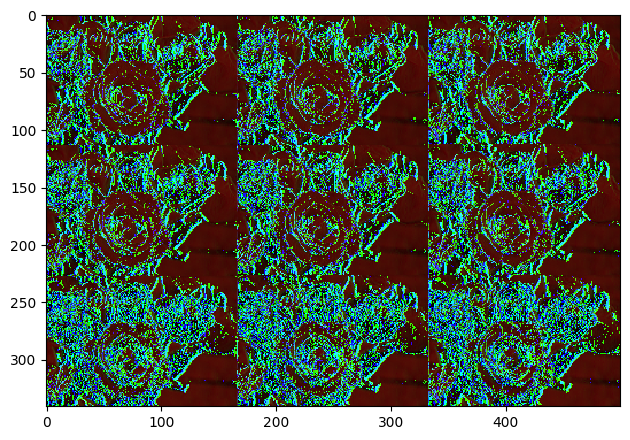

In [72]:
imshow(luv_image)

In [90]:
import numpy as np
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

def rgb_to_luv_man(image):
    a = np.array([
    [0.412453,0.35758,0.180423],
    [0.212671,0.715160,0.072169],
    [0.019334,0.119193,0.950227]])
    
    R = image[...,0]/255.0
    G = image[...,1]/255.0
    B = image[...,2]/255.0

    # D = np.array([])
    # for i in a:
    #     m = (i[0]*R)+(i[1]*G)+(i[2]*B)
    #     D = np.append(D,m)
    # print(D.shape)

    # D = D.reshape((-1,3))
    # D = np.dot(a, image)

    # X = D[...,0]
    # Y = D[...,1]
    # Z = D[...,2]
    # print(D.shape)
    # print(X.shape)
    X = (0.412453*R) + (0.35758*G) + (0.180423*B)
    Y = (0.212671*R) + (0.715160*G) + (0.072169*B)
    Z = (0.019334*R) + (0.119193*G) + (0.950227*B)
    
    L = np.zeros_like(Y)
    # for i in np.arange(len(Y)):
    #     if (Y[i] > 0.008856):
    #         L[i] = 116*((Y[i])**(1/3))-16
    #     else:
    #         L[i] = (903.3)*Y[i]
    L[Y > 0.008856] = 116*((Y[Y > 0.008856])**(1/3))-16
    L[Y <= 0.008856] = (903.3)*Y[Y <= 0.008856]
    
    u_n = 0.19793943
    v_n = 0.46831096
    denom = X + 15*Y + 3*Z
    u_m = 4 * X / denom
    v_m = 9 * Y / denom

    u = 13 * L * (u_m - u_n)
    v = 13 * L * (v_m - v_n)

    # v = v.reshape((image.shape[0],image.shape[1]))
    # u = u.reshape((image.shape[0],image.shape[1]))
    # L = L.reshape((image.shape[0],image.shape[1]))

    # Combine L, u, v into LUV image
    luv_image = np.zeros_like(image)
    luv_image[..., 0] = L
    luv_image[..., 1] = u
    luv_image[..., 2] = v
    
    return luv_image

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13188\2056506453.py:45: RuntimeWarning: invalid value encountered in divide
  u_m = 4 * X / denom
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13188\2056506453.py:46: RuntimeWarning: invalid value encountered in divide
  v_m = 9 * Y / denom


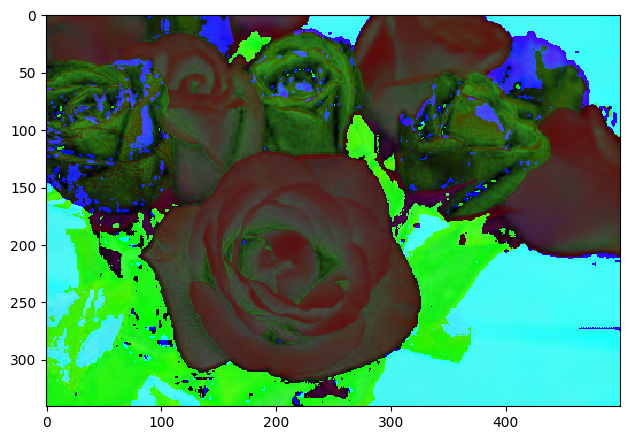

In [91]:
imshow(rgb_to_luv_man(image))

In [ ]:
import numpy as np

def rgb_to_luv_2(image):
    if image.ndim != 3 or image.shape[2] != 3:
        raise ValueError('Input image should be a 3D array with shape (height, width, channels)')
        
    a = np.array([
        [0.412453,0.35758,0.180423],
        [0.212671,0.715160,0.072169],
        [0.019334,0.119193,0.950227]])

    R = image[...,0]/255.0
    G = image[...,1]/255.0
    B = image[...,2]/255.0

    D = np.dot(a, np.stack((R, G, B), axis=-1).T).T

    X = D[...,0]
    Y = D[...,1]
    Z = D[...,2]

    L = np.zeros_like(Y)
    L[Y > 0.008856] = 116*((Y[Y > 0.008856])**(1/3))-16
    L[Y <= 0.008856] = (903.3)*Y[Y <= 0.008856]

    u_n = 0.19793943
    v_n = 0.46831096
    denom = X + 15*Y + 3*Z
    u_m = 4 * X / denom
    v_m = 9 * Y / denom

    u = 13 * L * (u_m - u_n)
    v = 13 * L * (v_m - v_n)

    luv_image = np.zeros_like(image)
    luv_image[..., 0] = L
    luv_image[..., 1] = u
    luv_image[..., 2] = v

    return luv_image

In [ ]:
imshow(rgb_to_luv_2(image))

ValueError: shapes (3,3) and (3,1200,770) not aligned: 3 (dim 1) != 1200 (dim 1)

In [83]:
# Chatgpt code

import numpy as np

def rgb_to_luv(rgb_image):
    # Accessing the R,G,B channels in the image and normalizing it
    R = rgb_image[..., 0] / 255.0
    G = rgb_image[..., 1] / 255.0
    B = rgb_image[..., 2] / 255.0
    
    # Constants for XYZ to LUV conversion
    X_n = 0.5
    Y_n = 0.5
    Z_n = 0.5

    # Constants for LUV conversion
    u_n = (4*X_n) / (X_n + 15*Y_n + 3*Z_n)
    v_n = (9*Y_n) / (X_n + 15*Y_n + 3*Z_n)

    # Convert RGB image to XYZ color space
    X = 0.412453*R + 0.357580*G + 0.180423*B
    Y = 0.212671*R + 0.715160*G + 0.072169*B
    Z = 0.019334*R + 0.119193*G + 0.950227*B

    # Convert XYZ to LUV color space
    denom = X + 15*Y + 3*Z
    u_d = ((4*X) / denom)
    v_d = ((9*Y) / denom)
    L = 116 * (((Y/Y_n) ** (1/3)) - 1)
    u = 13 * L * (u_d - u_n)
    v = 13 * L * (v_d - v_n)

    # Combine L, u, v into LUV image
    luv_image = np.zeros_like(rgb_image)
    luv_image[..., 0] = L
    luv_image[..., 1] = u
    luv_image[..., 2] = v

    return luv_image


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13188\2601347030.py:27: RuntimeWarning: invalid value encountered in divide
  u_d = ((4*X) / denom)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13188\2601347030.py:28: RuntimeWarning: invalid value encountered in divide
  v_d = ((9*Y) / denom)


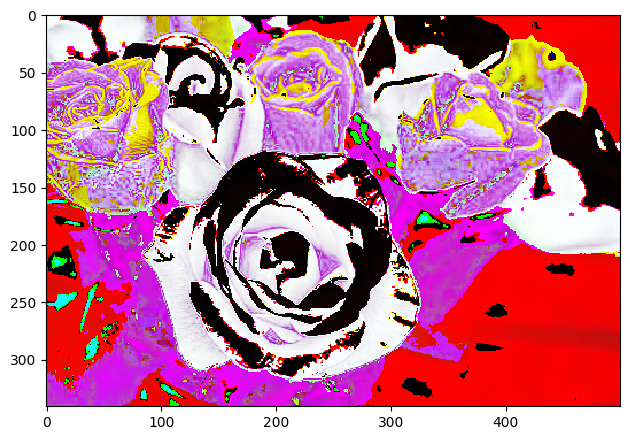

In [84]:
imshow(rgb_to_luv(image))

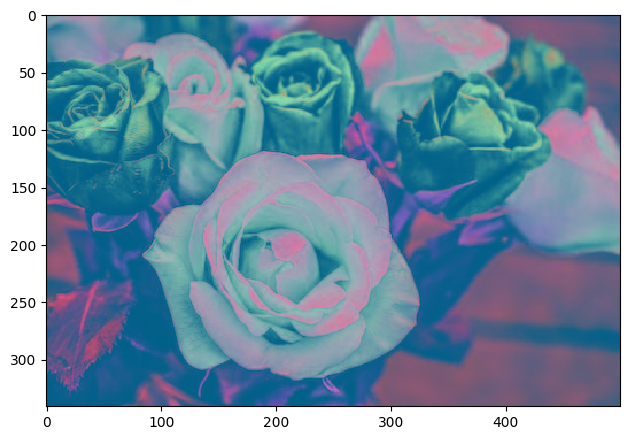

In [85]:
# test code
import cv2

# Convert RGB image to LUV color space
luv_image_cv = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)

# Display the LUV image
imshow(luv_image_cv)